In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import astropy.io.fits as fits
#from astropy import units as u
#from astropy import constants as const

In [2]:
path = "../../../6x2pt_Roman_SO/growth_parameters/"
f_cosmosis = np.loadtxt(path+"f_z.txt")
D_cosmosis = np.loadtxt(path+"d_z.txt")
z_cosmosis = np.loadtxt(path+"z.txt")
a_cosmosis = np.loadtxt(path+"a.txt")

In [3]:
# implemeting f = Omega_m(a)^gamma(a)
#a = np.logspace(-2, 0, 1000)
z = np.arange(0, 7+0.02, 0.02)
#a = np.linspace(0.2,1, 10000)
a =  1/(1+z)
#a = a[::-1] 
#a = np.logspace(-1,0, 1000)
omegam0 = 0.3156
omegal0 = 1- omegam0
Hsquare = omegam0 * a**(-3) + omegal0
omegam = omegam0 * a**(-3) /(Hsquare)
gamma = 0.55


f = omegam**gamma
#what is this normalization? I am not so sure


In [4]:
f[0]

0.5303045422157139

Text(0.5, 0, 'a')

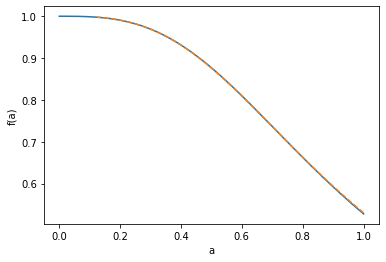

In [5]:
plt.plot(a_cosmosis, f_cosmosis)
plt.plot(a, f, "--")
plt.ylabel("f(a)")
plt.xlabel("a")

$$D(a)/a = exp(\int_0^a dlna [f(a) -1])$$

[0.         0.010101   0.02020195 0.03030268 0.04040295 0.05050241
 0.06060062 0.07069704 0.08079101 0.09088179 0.10096856 0.11105036
 0.12112617 0.13119487 0.14125523 0.15130594 0.16134561 0.17137275
 0.18138578 0.19138306 0.20136286 0.21132336 0.22126269 0.23117891
 0.24107001 0.25093391 0.26076851 0.27057163 0.28034107 0.29007457
 0.29976986 0.30942464 0.31903659 0.32860337 0.33812264 0.34759208
 0.35700934 0.36637212 0.37567812 0.38492507 0.39411075 0.40323295
 0.41228954 0.42127842 0.43019756 0.43904496 0.44781874 0.45651706
 0.46513815 0.47368033 0.48214201 0.49052169 0.49881793 0.50702941
 0.51515489 0.52319323 0.53114337 0.53900437 0.54677537 0.5544556
 0.5620444  0.56954118 0.57694548 0.5842569  0.59147514 0.59859999
 0.6056313  0.61256905 0.61941326 0.62616404 0.63282157 0.63938611
 0.64585799 0.65223758 0.65852535 0.66472179 0.67082747 0.67684301
 0.68276907 0.68860635 0.69435562 0.70001766 0.70559329 0.71108338
 0.71648882 0.72181054 0.72704946 0.73220656 0.73728283 0.74227

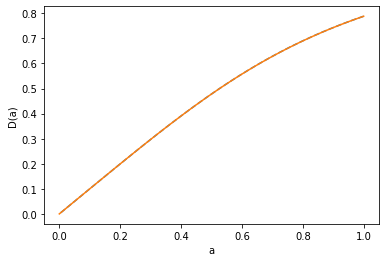

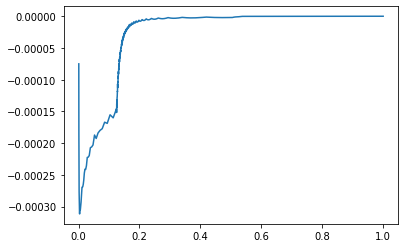

In [7]:
#test
# calculating the integral to D
#starting integral at early time 

a = np.linspace(0, 1, 100)
omegam0 = 0.3156
omegal0 = 1- omegam0
Hsquare = omegam0 * a[1:]**(-3) + omegal0
omegam = omegam0 * a[1:]**(-3) /(Hsquare)
gamma = 0.55

f = np.zeros(100)
f[0] = 1
f[1:] = omegam**gamma

import scipy.integrate as integrate


D = (integrate.cumtrapz((f-1)/(a+0.00001), a, initial=0.))


D = np.exp(D)

D = D*a

print(D)


plt.plot(a_cosmosis, D_cosmosis, "--")
#plt.plot(a, np.array(D)/7.4, "--")
plt.plot(a, np.array(D))#*0.79)


plt.xlabel("a")
plt.ylabel("D(a)")

plt.figure()
#plt.plot(a_cosmosis, (np.interp(a_cosmosis, a, np.array(D))-D_cosmosis))
plt.plot(a_cosmosis, (np.interp(a_cosmosis[::-1], a, np.array(D))-D_cosmosis[::-1]))


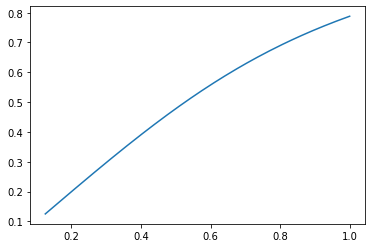

In [8]:
a_output =  1/(1+z)
d_output = np.interp(a_output,a,D)
plt.plot(a_output, d_output)

In [9]:
%time (integrate.cumtrapz((f-1)/(a+0.00001), a, initial=0.))

CPU times: user 114 µs, sys: 18 µs, total: 132 µs
Wall time: 130 µs


array([ 0.00000000e+00, -6.14001773e-07, -3.68519597e-06, -1.16718013e-05,
       -2.70314624e-05, -5.22206111e-05, -8.96935734e-05, -1.41901423e-04,
       -2.11290583e-04, -3.00301179e-04, -4.11365146e-04, -5.46904090e-04,
       -7.09326924e-04, -9.01027264e-04, -1.12438062e-03, -1.38174134e-03,
       -1.67543945e-03, -2.00777715e-03, -2.38102534e-03, -2.79741982e-03,
       -3.25915744e-03, -3.76839219e-03, -4.32723107e-03, -4.93772998e-03,
       -5.60188962e-03, -6.32165124e-03, -7.09889254e-03, -7.93542351e-03,
       -8.83298245e-03, -9.79323200e-03, -1.08177553e-02, -1.19080526e-02,
       -1.30655372e-02, -1.42915332e-02, -1.55872714e-02, -1.69538877e-02,
       -1.83924196e-02, -1.99038050e-02, -2.14888800e-02, -2.31483774e-02,
       -2.48829260e-02, -2.66930493e-02, -2.85791660e-02, -3.05415892e-02,
       -3.25805275e-02, -3.46960854e-02, -3.68882647e-02, -3.91569658e-02,
       -4.15019897e-02, -4.39230404e-02, -4.64197269e-02, -4.89915664e-02,
       -5.16379872e-02, -